In [6]:
import skfuzzy as fuzzy
import skfuzzy.control as ctrl
import numpy as np

# Configuration
tolerance = 2  # cm
e_max, e_min = 120, -100
e_range = np.arange(-100, 120, 0.1)

# Variable Definitions
error = ctrl.Antecedent(e_range, 'error')      # input
power = ctrl.Consequent(np.arange(0, 100, 0.1), 'power')  # output

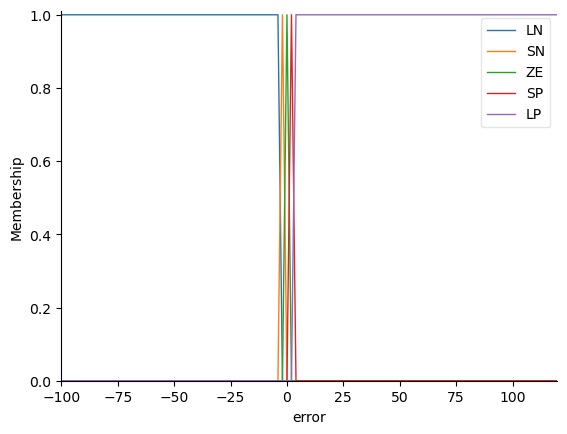

In [7]:
# Input membership functions

error['LN'] = fuzzy.trapmf(error.universe, [e_min, e_min, -2 * tolerance, -tolerance])
error['SN'] = fuzzy.trimf(error.universe, [-2 * tolerance, -tolerance, 0])
error['ZE'] = fuzzy.trimf(error.universe, [-tolerance, 0, tolerance])
error['SP'] = fuzzy.trimf(error.universe, [0, tolerance, 2 * tolerance])
error['LP'] = fuzzy.trapmf(error.universe, [tolerance, 2 * tolerance, e_max, e_max])

error.view()

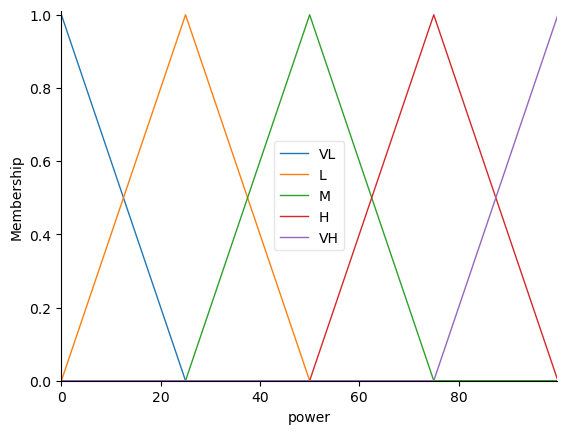

In [8]:
# Output membership functions

power['VL'] = fuzzy.trimf(power.universe, [0, 0, 25])
power['L']  = fuzzy.trimf(power.universe, [0, 25, 50])
power['M']  = fuzzy.trimf(power.universe, [25, 50, 75])
power['H']  = fuzzy.trimf(power.universe, [50, 75, 100])
power['VH'] = fuzzy.trimf(power.universe, [75, 100, 100])

power.view()

In [9]:
# Rules

rule1 = ctrl.Rule(error['LN'], power['VL'])
rule2 = ctrl.Rule(error['SN'], power['L'])
rule3 = ctrl.Rule(error['ZE'], power['M'])
rule4 = ctrl.Rule(error['SP'], power['H'])
rule5 = ctrl.Rule(error['LP'], power['VH'])

In [ ]:
# Create the Control System and Simulation

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
controller = ctrl.ControlSystemSimulation(control_system)

# Test inputs
test_errors = [1.3, 0.7]

for d in test_errors:
    controller.input['error'] = d
    controller.compute()
    
    # Defuzzification result
    p = controller.output['power']
    print(f"Error: {d:.2f} cm -> Output Power: {p:.2f}")

Error: 1.30 cm -> Output Power: 65.55
Error: 0.70 cm -> Output Power: 59.44
